In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/ml-1m/movies.dat", sep = "::", header = None,
                     encoding = "ISO-8859-1",
                     names = ["MovieID","Title","Genres"]
                     )

ratings = pd.read_csv("/content/drive/MyDrive/ml-1m/ratings.dat", sep = "::", header = None,
                     encoding = "ISO-8859-1",
                     names = ["UserID","MovieID","Rating","Timestamp"]
                     )

users = pd.read_csv("/content/drive/MyDrive/ml-1m/users.dat", sep = "::", header = None,
                     encoding = "ISO-8859-1",
                     names = ["UserID","Gender","Age","Occupation","Zip-code"]
                     )


<ipython-input-2-a066e08d7872>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("/content/drive/MyDrive/ml-1m/movies.dat", sep = "::", header = None,
<ipython-input-2-a066e08d7872>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("/content/drive/MyDrive/ml-1m/ratings.dat", sep = "::", header = None,
<ipython-input-2-a066e08d7872>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='p

In [ ]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
users.head(

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [ ]:
movies.tail()

,MovieID,Title,Genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [ ]:
ratings.shape

(1000209, 4)

**Data Visualization**

In [ ]:
age_group = users.groupby("Age").size()

In [ ]:
age_group

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

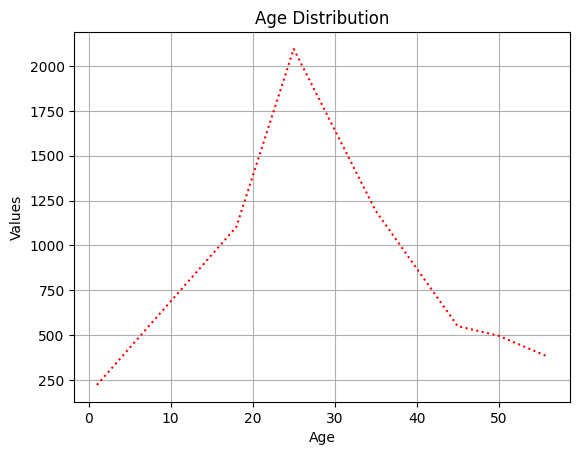

In [ ]:
plt.plot(age_group, linestyle = ":", color = "r")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Values")
plt.grid(True)
plt.show()

The above graph show that we have more user having Age (25-34)

In [ ]:
gender_group = users["Gender"].value_counts()

In [ ]:
gender_group

M    4331
F    1709
Name: Gender, dtype: int64

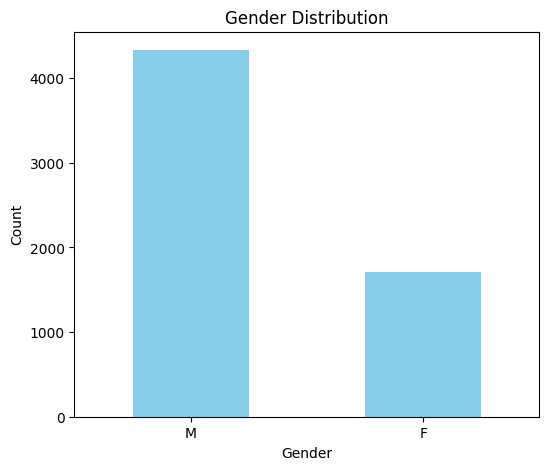

In [ ]:
plt.figure(figsize=(6, 5))
gender_group.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
user_group = ratings.groupby(['UserID']).size()
user_group.head(10)

UserID
1      53
2     129
3      51
4      21
5     198
6      71
7      31
8     139
9     106
10    401
dtype: int64

**Counting Corresponding Movie Posters in Directory**

In [ ]:
import os
import pandas as pd

# Directory where your movie posters are stored
poster_directory = '/content/drive/MyDrive/MLP-1M'


# Read the CSV file using Pandas
df = movies

# Get a list of movie IDs from the CSV
movie_ids = list(df['MovieID']) # Replace 'MovieID' with the actual column name in your CSV
print(type(movie_ids[0]))
# Initialize a counter for the posters
poster_count = 0

# Iterate through the files in the poster directory
for filename in os.listdir(poster_directory):
        movie_id = filename.split('.')[0]
        #print(movie_id)
        if int(movie_id) in movie_ids:
            poster_count += 1

# Print the total number of posters found
print(f'Total number of posters: {poster_count}')


<class 'int'>
Total number of posters: 3816
